In [240]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas_profiling as pf
import statsmodels.formula.api as smf
import re
import warnings
warnings.filterwarnings('ignore')

In [37]:
os.chdir("D:\AnalytiXlabs\PYTHON\CASE-STUDIES\Basic Statistics - Hypothesis Testing")

In [38]:
%pwd

'D:\\AnalytiXlabs\\PYTHON\\CASE-STUDIES\\Basic Statistics - Hypothesis Testing'

# BUSINESS PROBLEM - 1

## Using lending club loans data, the team would like to test below hypothesis on how different factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)


In [39]:
loansdata = pd.read_csv('./LoansData.csv')
loansdata.head()

,loanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,1,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [40]:
loansdata.dtypes

loanID                              int64
Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [41]:
loansdata.duplicated(subset=None, keep='first').sum()

0

In [42]:
loansdata.columns = [x.replace('.','_') for x in loansdata.columns]
loansdata.columns

Index(['loanID', 'Amount_Requested', 'Amount_Funded_By_Investors',
       'Interest_Rate', 'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio',
       'State', 'Home_Ownership', 'Monthly_Income', 'FICO_Range',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length'],
      dtype='object')

In [43]:
loansdata

,loanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,2497,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,2498,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,2499,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


In [44]:
loansdata['Interest_Rate'] = loansdata['Interest_Rate'].str.rstrip('%').astype('float')

In [45]:
loansdata['Debt_To_Income_Ratio'] = loansdata['Debt_To_Income_Ratio'].str.rstrip('%').astype('float')

In [46]:
loansdata['Loan_Length'] = loansdata['Loan_Length'].str.rstrip('months').astype('float')

In [47]:
loansdata['Employment_Length'] = loansdata.Employment_Length.str.replace(' years','').str.replace(' year','').str.replace('< ','').str.replace('+','').astype('float')

In [48]:
loansdata

,loanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.00,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1.0
1,2,19200.0,19200.00,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2.0
2,3,35000.0,35000.00,21.98,60.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2.0
3,4,10000.0,9975.00,9.99,36.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5.0
4,5,12000.0,12000.00,11.71,36.0,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,30000.0,29950.00,16.77,60.0,debt_consolidation,19.23,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8.0
2496,2497,16000.0,16000.00,14.09,60.0,home_improvement,21.54,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10.0
2497,2498,10000.0,10000.00,13.99,36.0,debt_consolidation,4.89,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10.0
2498,2499,6000.0,6000.00,12.42,36.0,major_purchase,16.66,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5.0


In [49]:
loansdata['Interest_Rate'] = loansdata['Interest_Rate'].apply(pd.to_numeric)
loansdata['Debt_To_Income_Ratio'] = loansdata['Debt_To_Income_Ratio'].apply(pd.to_numeric)
loansdata['Loan_Length'] = loansdata['Loan_Length'].apply(pd.to_numeric)
loansdata.dtypes

loanID                              int64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                       float64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                 float64
dtype: object

In [50]:
loansdata.isnull().sum()

loanID                             0
Amount_Requested                   1
Amount_Funded_By_Investors         1
Interest_Rate                      2
Loan_Length                        0
Loan_Purpose                       0
Debt_To_Income_Ratio               1
State                              0
Home_Ownership                     1
Monthly_Income                     1
FICO_Range                         2
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 77
dtype: int64

In [51]:
def missing_values(i):
    if ((i.dtype == 'float') or (i.dtype == 'int')):
        i = i.fillna(i.median())
    elif((i.dtype == 'object') or (i.dtype == 'O')):
        i = i.fillna(i.mode()[0])
    else:
        i = i
    return i
    
    
loansdata = loansdata.apply(missing_values)

In [52]:
loansdata.isnull().sum()

loanID                            0
Amount_Requested                  0
Amount_Funded_By_Investors        0
Interest_Rate                     0
Loan_Length                       0
Loan_Purpose                      0
Debt_To_Income_Ratio              0
State                             0
Home_Ownership                    0
Monthly_Income                    0
FICO_Range                        0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
Employment_Length                 0
dtype: int64

In [54]:
def outlier_values(i):
    if ((i.dtype == 'float') or (i.dtype == 'int')):
        i = i.clip(lower = i.quantile(.01), upper = i.quantile(.99))
    else:
        i = i
    return i

loansdata = loansdata.apply(outlier_values)

In [55]:
loansdata

,loanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.00,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1.0
1,2,19200.0,19200.00,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2.0
2,3,35000.0,35000.00,21.98,60.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2.0
3,4,10000.0,9975.00,9.99,36.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5.0
4,5,12000.0,12000.00,11.71,36.0,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,30000.0,29950.00,16.77,60.0,debt_consolidation,19.23,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8.0
2496,2497,16000.0,16000.00,14.09,60.0,home_improvement,21.54,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10.0
2497,2498,10000.0,10000.00,13.99,36.0,debt_consolidation,4.89,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10.0
2498,2499,6000.0,6000.00,12.42,36.0,major_purchase,16.66,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5.0


In [56]:
loansdata['FICO_avg'] = (loansdata.FICO_Range.str.split('-', expand = True)[0].astype('float') + loansdata.FICO_Range.str.split('-', expand = True)[1].astype('float'))/2


In [57]:
loansdata.head()

,loanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_avg
0,1,20000.0,20000.0,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1.0,737.0
1,2,19200.0,19200.0,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2.0,717.0
2,3,35000.0,35000.0,21.98,60.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2.0,692.0
3,4,10000.0,9975.0,9.99,36.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5.0,697.0
4,5,12000.0,12000.0,11.71,36.0,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9.0,697.0


In [58]:
loansdata.drop('loanID', axis= 'columns', inplace=True)

In [59]:
loansdata.drop('FICO_Range', axis= 'columns', inplace=True)

In [60]:
loansdata.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_avg
0,20000.0,20000.0,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,14.0,14272.0,2.0,1.0,737.0
1,19200.0,19200.0,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,12.0,11140.0,1.0,2.0,717.0
2,35000.0,35000.0,21.98,60.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,14.0,21977.0,1.0,2.0,692.0
3,10000.0,9975.0,9.99,36.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,10.0,9346.0,0.0,5.0,697.0
4,12000.0,12000.0,11.71,36.0,credit_card,18.78,NJ,RENT,3195.00,11.0,14469.0,0.0,9.0,697.0


### a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)


In [62]:
import scipy.stats as stats

In [107]:
stats.pearsonr(loansdata['Interest_Rate'], loansdata['Amount_Funded_By_Investors'])

(0.3356719553957688, 6.772326548355076e-67)

##### Conclusion :

From the above test, we can conclude that the P-value is smaller than 0.05.
Hence NULL hypothesis(H0) is rejected, And we can assume that there is enough evidence to support the alternative hypothesis.
With this, we assume that there is no difference between means and conlcude that significant difference exists.
Hence the given statement is true. `The less Interest rate charged for high loan amounts.`

### b. Loan length is directly effecting intrest rate

In [244]:
stats.pearsonr(loansdata['Loan_Length'], loansdata['Interest_Rate'] )

(0.42313299005227767, 3.6559149831377863e-109)

##### Conclusion :-
From the above test we get that, P-value is 3.6559149831377863e-109.   
Since P-value is smaller than 0.05. We shall reject the null hypothesis in each case.
`Hence we can conclude that there is sufficient evidence to say that loan length is directly affecting interest rate.`

### c. Inrest rate varies for different purpose of loans

In [245]:
diff_purpose = loansdata.Loan_Purpose.unique()

In [246]:
for x in diff_purpose:
    print(loansdata.Interest_Rate(x).sum())

TypeError: 'Series' object is not callable

### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.


In [247]:
loansdata.Home_Ownership.unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [248]:
home_owner = loansdata.FICO_avg[loansdata.Home_Ownership == 'OWN']

In [249]:
stats.f_oneway(home_owner,loansdata.FICO_avg)

F_onewayResult(statistic=0.06706051869391198, pvalue=0.7956855051380114)

##### Conclusion:

#### From the above hypothesis test, we get that the P-value is larger than 0.05. 
`Hence we should accept the Alternate hypothesis. `

There is no existance of difference in relationship between Home ownership and FICO Average.
`Hence, it is assumed that they are not similar.`

# BUSINESS PROBLEM - 2

## We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

In [129]:
AVG_price_quote = pd.read_csv('D:\AnalytiXlabs\PYTHON\CASE-STUDIES\Basic Statistics - Hypothesis Testing\Price_Quotes.csv')
AVG_price_quote

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [133]:
stats.pearsonr(AVG_price_quote['Barry_Price'], AVG_price_quote['Mary_Price'])

(0.8244127830429856, 0.0009709574235546202)

##### Conclusion:

From the above test, we can conclude that the P-value is smaller than 0.05.
Hence NULL hypothesis(H0) is rejected.
`Hence we conclude that the Correlation statistically sigificant.`

# BUSINESS PROBLEM - 3

### Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?

In [137]:
treat_facility = pd.read_csv('D:\AnalytiXlabs\PYTHON\CASE-STUDIES\Basic Statistics - Hypothesis Testing\Treatment_Facility.csv')

In [139]:
treat_facility.head()

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [140]:
treat_facility.rename(columns = {'VAR4':'TRFF', 'VAR5':'CI'}, inplace = True)
treat_facility.head()

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [141]:
treat_facility.Reengineer.unique()

array(['Prior', 'Post'], dtype=object)

In [143]:
ci_prior = treat_facility.CI[treat_facility.Reengineer == 'Prior']
ci_post = treat_facility.CI[treat_facility.Reengineer == 'Post']

In [145]:
stats.ttest_ind(ci_prior, ci_post)

Ttest_indResult(statistic=1.6279144253528646, pvalue=0.12091989189884149)

##### Conclusion :-

From the above hypothesis testing, we got the P-value is larger than 0.05.
Therefore we cannot reject the null hypothesis.

Hence, We conclude that the incidence behavioral problem effort cannot changed the Critical incident problems.

In [148]:
prior_turnover = treat_facility.Employee_Turnover[treat_facility.Reengineer == 'Prior']
post_turnover = treat_facility.Employee_Turnover[treat_facility.Reengineer == 'Post']

In [149]:
stats.ttest_ind(prior_turnover, post_turnover)

Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)

##### Conclusion :-

From the above hypothesis testing, we got the P-value is larger than 0.05.
Therefore we cannot reject the null hypothesis.

Existance of significant difference between Reengineering and Employee turnover cannot be concluded.

Hence, We conclude that the incidence behavioral problem effort cannot changed the Critical incident problems.

`There is NO evidence that the critical incidence rate improved.`

# BUSINESS PROBLEM - 4

### We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether thisis, in fact, occurring.

In [159]:
Assess_priority = pd.read_csv('D:\AnalytiXlabs\PYTHON\CASE-STUDIES\Basic Statistics - Hypothesis Testing\Priority_Assessment.csv')
Assess_priority.head()

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium


In [160]:
high_priority = Assess_priority.Priority=='High'
medium_priority = Assess_priority.Priority=='Medium'
low_priority = Assess_priority.Priority=='Low'

In [162]:
stats.ttest_ind(high_priority, medium_priority)

Ttest_indResult(statistic=4.349696519519604, pvalue=1.4713706828326097e-05)

##### Conclusion :-
From the above Hypothesis test, we can get the P-value is smaller than 0.05.
`Therefore null hypothesis(H0) is rejected.`

So, We assume that High priority jobs on Average are being completed more quickly than Medium priority jobs.


`Hence, We can say that System is working for high to medium priority jobs.`

In [168]:
stats.ttest_ind(medium_priority,low_priority)

Ttest_indResult(statistic=12.477336143283122, pvalue=8.353233524224478e-34)

##### Conclusion :-
From the above Hypothesis test, we can get the P-value is smaller than 0.05.
`Therefore null hypothesis(H0) is rejected.`

So, We assume that Medium priority jobs on Average are being completed more quickly than Low priority jobs.


`Hence, We can say that System is working for high to medium priority jobs.`

# BUSINESS PROBLEM - 5

### Use the survey results to address the following questions.
#### 1) What isthe overall level of customer satisfaction?
#### 2) What factors are linked to satisfaction?
#### 3) What is the demographic profile of Film on the Rocks patrons?
#### 4) In what media outlet(s) should the film series be advertised?


In [172]:
films_data = pd.read_csv('D:\AnalytiXlabs\PYTHON\CASE-STUDIES\Basic Statistics - Hypothesis Testing\Films.csv')
films_data.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [173]:
films_data.dtypes

_rowstate_          int64
Movie              object
Gender             object
Marital_Status     object
Sinage            float64
Parking           float64
Clean             float64
Overall           float64
Age               float64
Income            float64
Hear_About         object
dtype: object

In [175]:
films_data.isnull().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [176]:
films_data.dropna(inplace=True)

In [185]:
films_data.isnull().sum()

Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

In [ ]:
films_data.drop(columns='_rowstate_', inplace=True)

In [187]:
films_data.head()

,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,Ferris Buellers Day Off,2.0,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,Ferris Buellers Day Off,2.0,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,Ferris Buellers Day Off,1.0,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,Ferris Buellers Day Off,2.0,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,Ferris Buellers Day Off,2.0,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [ ]:
films_data['Gender'] = films_data.Gender.str.replace('Male', '1').str.replace('Female','2')
films_data['Gender'] = films_data['Gender'].astype('float')
films_data['Gender']

In [193]:
films_data.Marital_Status.unique()

array([1., 2.])

In [ ]:
films_data['Marital_Status'] = films_data.Marital_Status.str.replace('Slngle','2').str.replace('Single','2').str.replace('Married','1')
films_data['Marital_Status'] = films_data['Marital_Status'].astype('float')

In [199]:
films_data.dtypes

Movie              object
Gender            float64
Marital_Status    float64
Sinage            float64
Parking           float64
Clean             float64
Overall           float64
Age               float64
Income            float64
Hear_About         object
dtype: object

### 1) What isthe overall level of customer satisfaction?

In [202]:
std_dev = films_data.Overall.std()
std_dev

0.6753367561589327

In [204]:
num = films_data.Overall.count()
num

301

In [205]:
sample_mean = films_data.Overall.mean()
sample_mean

1.6212624584717608

In [207]:
standard_error = std_dev/np.sqrt(num)
standard_error

0.038925763497347034

In [218]:
print("Overall level customer satisfaction in population level with 95% confidence lies in the range between ",(round((sample_mean - 1.96 * standard_error),5),round((sample_mean + 1.96 * standard_error),5)))

Overall level customer satisfaction in population level with 95% confidence lies in the range between  (1.54497, 1.69756)


### 2) What factors are linked to satisfaction?

In [220]:
films_data.head()

,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,Ferris Buellers Day Off,2.0,1.0,2.0,2.0,2.0,2.0,3.0,1.0,5
1,Ferris Buellers Day Off,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,5
2,Ferris Buellers Day Off,1.0,1.0,2.0,4.0,3.0,2.0,4.0,1.0,5
3,Ferris Buellers Day Off,2.0,1.0,1.0,3.0,2.0,2.0,4.0,1.0,5
4,Ferris Buellers Day Off,2.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,1


#### _We need to check the relationship among "Sinage", "Parking", "Clean" with the "Overall" variable. So we can assume that the  "Overall" variable is Y variable. Hence, we need to check the linear relationship between all the X variables with Y one._

In [223]:
stats.pearsonr(films_data['Sinage'], films_data['Overall'])

(0.41068947395476774, 1.1216055328082663e-13)

In [225]:
stats.pearsonr(films_data['Parking'], films_data['Overall'])

(0.547717040093135, 5.815651388569721e-25)

In [224]:
stats.pearsonr(films_data['Clean'], films_data['Overall'])

(0.38552254938449104, 4.194278906459256e-12)

`Conclusion :-`

From the above 3 tests, We can see that the P-value is smaller than 0.05. Therefore we can assume that we have enough evidence to reject NULL Hypothesis H0. So, We can say that with the 95% confidence, that the factors that are linked to "Overall" customer satisfaction are all the X variables (Sinage, Parking & Clean).

`Hence there is a linear relationship between Sinage, Parking & Clean with Overall variable.`

### 3) What is the demographic profile of Film on the Rocks patrons?

### 4) In what media outlet(s) should the film series be advertised?

In [241]:
sns.set_style("ticks")
sns.set_style('darkgrid')

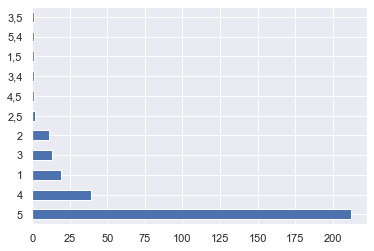

In [242]:
films_data.Hear_About.value_counts().plot(kind = 'barh')
plt.show()

`Conclusion :-`

We are showing from the above data series, 1 = television; 2 = newspaper; 3 = radio; 4 = website; 5 = word of mouth.
From the above bar graph, We can conclude that the Word of mouth is the largest in number, but it's not a media outlet. Next to that there is the 4 = website.

`Therefore "Website" is the best media outlet to advertise the film series. `